In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to datasets
train_dir = r"D:\Project-cotton prediction\train"
val_dir = r"D:\Project-cotton prediction\val"
test_dir = r"D:\Project-cotton prediction\test"

# ImageDataGenerator for training, validation, and test
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values between 0 and 1
    shear_range=0.2,           # Apply random shear transformation
    zoom_range=0.2,            # Randomly zoom into images
    horizontal_flip=True        # Randomly flip images horizontally
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),     # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'    # Assuming you have multiple classes
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.
Found 36 images belonging to 5 classes.


In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(4, activation='softmax')  # Change to 5 classes
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 73s 984ms/step - accuracy: 0.6812 - loss: 1.0900 - val_accuracy: 0.9259 - val_loss: 0.2345
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 62s 955ms/step - accuracy: 0.9340 - loss: 0.1843 - val_accuracy: 0.9352 - val_loss: 0.1907
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 62s 953ms/step - accuracy: 0.9315 - loss: 0.1582 - val_accuracy: 0.9105 - val_loss: 0.2510
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 62s 950ms/step - accuracy: 0.9324 - loss: 0.1784 - val_accuracy: 0.9691 - val_loss: 0.1194
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 62s 952ms/step - accuracy: 0.9596 - loss: 0.1148 - val_accuracy: 0.9074 - val_loss: 0.2360
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 62s 953ms/step - accuracy: 0.9713 - loss: 0.0907 - val_accuracy: 0.9660 - val_loss: 0.1341
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 62s 963ms/step - accuracy: 0.9644 - loss: 0.1071 - val_accuracy: 0.9660 - val_loss: 0.1303
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 63s 968ms/step - accuracy: 0.9600 - loss: 0.1081 - val_accu

In [38]:
#Rerun_remove_extrafile_from_testdataset

In [28]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import matplotlib.pyplot as plt

In [29]:
# Set directories for train, validation, and test datasets
train_dir = r'D:\Project-cotton prediction\train'
val_dir = r'D:\Project-cotton prediction\val'
test_dir = r'D:\Project-cotton prediction\test'


In [30]:
# Parameters
img_size = (224, 224)  # Image size
batch_size = 32  # Batch size

In [32]:
# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for evaluation
)

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [33]:
# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

In [34]:
# Freeze the base model
base_model.trainable = False

In [35]:
# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])


In [36]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10


C:\Users\biror\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 54s 769ms/step - accuracy: 0.6944 - loss: 1.1287 - val_accuracy: 0.9414 - val_loss: 0.1926
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 49s 788ms/step - accuracy: 0.9505 - loss: 0.1246 - val_accuracy: 0.9753 - val_loss: 0.1146
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 48s 712ms/step - accuracy: 0.9716 - loss: 0.0891 - val_accuracy: 0.9784 - val_loss: 0.0948
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 712ms/step - accuracy: 0.9849 - loss: 0.0531 - val_accuracy: 0.9630 - val_loss: 0.1080
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 711ms/step - accuracy: 0.9933 - loss: 0.0312 - val_accuracy: 0.9630 - val_loss: 0.1053
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 715ms/step - accuracy: 0.9896 - loss: 0.0328 - val_accuracy: 0.9630 - val_loss: 0.1187
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 717ms/step - accuracy: 0.9822 - loss: 0.0457 - val_accuracy: 0.9691 - val_loss: 0.0881
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 44s 710ms/step - accuracy: 0.9980 - loss: 0.0129 - val_accuracy: 0.975

In [39]:
# Save the model
model.save('cotton_disease_model.keras')
print("Model saved as 'cotton_disease_model.keras'")

Model saved as 'cotton_disease_model.keras'


In [40]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0045
Test accuracy: 1.00


In [43]:
#Fine-tune the Model for removing overfitting 

In [42]:
# Unfreeze some layers in the base model for fine-tuning
base_model.trainable = True


# Compile the model again after making changes
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fine-tune the model
fine_tune_history = model.fit(train_generator, 
                               epochs=10, 
                               validation_data=val_generator)

# Evaluate the model again
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy after fine-tuning: {test_acc:.2f}')


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.6576 - loss: 1.7982 - val_accuracy: 0.9568 - val_loss: 0.1603
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.8947 - loss: 0.3009 - val_accuracy: 0.9352 - val_loss: 0.2195
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.9348 - loss: 0.1886 - val_accuracy: 0.9012 - val_loss: 0.3346
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.9696 - loss: 0.0868 - val_accuracy: 0.8827 - val_loss: 0.4532
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.9756 - loss: 0.0708 - val_accuracy: 0.8611 - val_loss: 0.5439
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.9779 - loss: 0.0545 - val_accuracy: 0.8611 - val_loss: 0.6061
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.9951 - loss: 0.0278 - val_accuracy: 0.8611 - val_loss: 0.6773
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.9949 - loss: 0.0227 - val_accuracy: 0.8673 - v

In [45]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy after fine-tuning: {test_acc:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8889 - loss: 1.0696
Test accuracy after fine-tuning: 0.89


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8889 - loss: 1.0696
Test accuracy after fine-tuning: 0.89


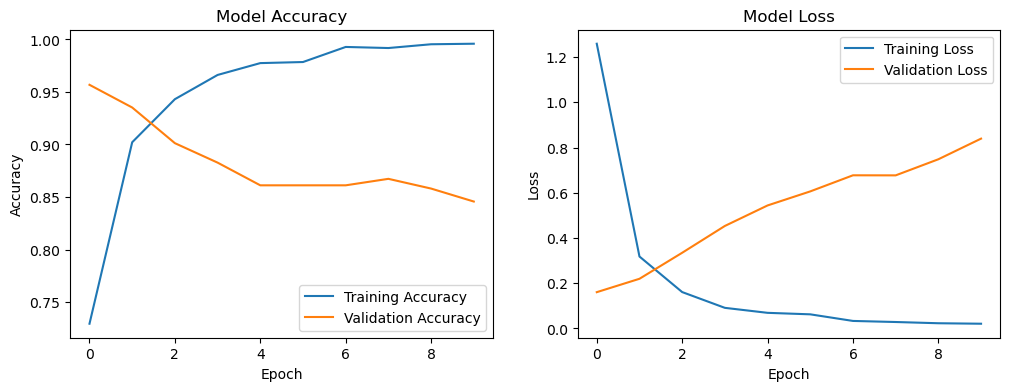

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


<Figure size 1000x800 with 0 Axes>

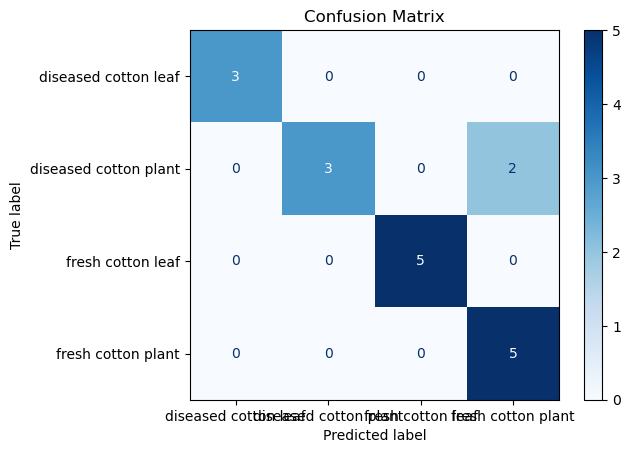

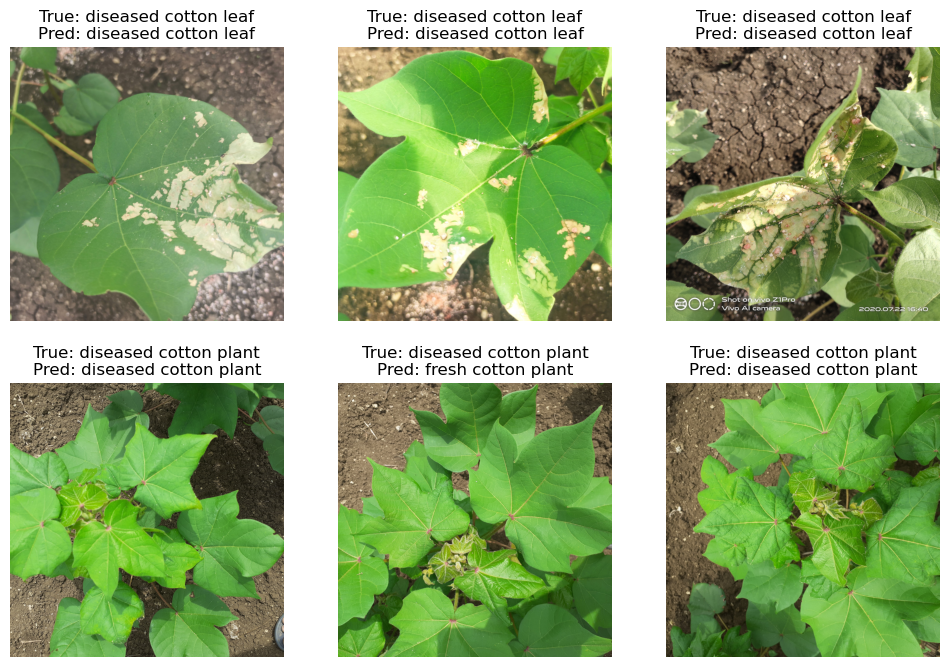

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Function to visualize test images with their predictions
def plot_test_images(test_images, predictions, true_labels):
    plt.figure(figsize=(12, 8))
    for i in range(len(test_images)):
        img = plt.imread(test_images[i])
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f'True: {class_labels[true_labels[i]]}\nPred: {class_labels[predictions[i]]}')
        plt.axis('off')
    plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy after fine-tuning: {test_acc:.2f}')

# Call the function to plot training history
plot_training_history(fine_tune_history)  # Use the history from fine-tuning

# Predict the classes for the test set
test_predictions = model.predict(test_generator)
predicted_classes = np.argmax(test_predictions, axis=1)
true_classes = test_generator.classes  # True labels from the generator
class_labels = list(test_generator.class_indices.keys())  # Class labels

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Visualize some test images
sample_test_images = test_generator.filepaths[:6]  # Get first 6 test images
sample_predictions = predicted_classes[:6]  # Corresponding predictions
sample_true_labels = true_classes[:6]  # Corresponding true labels

# Call the function to plot test images with predictions
plot_test_images(sample_test_images, sample_predictions, sample_true_labels)
